# SOCIAL MEDIA ANALYTICS PROJECT

Social Media Analytics for Business Intelligence - DAT-9731 - BOS1 - Prof. Beau Giannini & Prof. Pavel Paramonov
<br>
July 29th, 2021

LARS MARIUS STRØMBERG JAPPEE - ID: 10874606

## The European Super League

This analysis is about the current twitter climate for the European Super League, a new format soccer league for the best and most popular clubs in soccer. Looking at what the Super League can focus on to build a better campaign for an eventual relaunch.

The PR battle that followed the announcement of the European super league, will be a text book case in a few years. The mightiest most popular brands in sports were taken down by a social media and media campaign within two days. The whole battle was over before we managed to learn what the majority actually wanted. Now almost half a year later we can look at the sentiments of people now that the initial storm has calmed.

In [9]:
import json
import tweepy as tw

In [11]:
import config_twitter

In [12]:
# function to establish an initial API connection, respecting the rate limit
def connect_api_client():
    auth = tw.OAuthHandler(config_twitter.consumer_key, config_twitter.consumer_secret)
    auth.set_access_token(config_twitter.access_token, config_twitter.access_token_secret)
    api = tw.API(auth, wait_on_rate_limit=True)
    try:
        # returns False if credentials could not be verified
        api.verify_credentials()
        user = api.verify_credentials()
        if not user:
            raise("Credentials could not be verified: Please check config.py")
        print(f"Connected to Twitter API as {user.name}")
    except Exception as e:
        raise e
    return api

api = connect_api_client()

# construct a search query
query = '"european super league" OR "the super league" -filter:retweets'
 
# decide how many tweets to query
ntweets = 2000

# search and collect relevant tweets
tweets = [tweet._json for tweet in tw.Cursor(api.search, q=query, lang="en", tweet_mode='extended').items(ntweets)]

# save tweets data to json file
file_out = f"raw_tweet_data_{ntweets}.json"
with open(file_out, mode='w') as f:
    f.write(json.dumps(tweets, indent=2))

Connected to Twitter API as Lars.M.S.Jappée


In [13]:
# Check number of tweets in dataset.
len(tweets)

2000

In [14]:
# Check random tweets to quality controll content(will run several, only one showing here).
tweets[7]

{'created_at': 'Fri Jul 30 19:45:52 +0000 2021',
 'id': 1421195358122610688,
 'id_str': '1421195358122610688',
 'full_text': '@ReshadRahman_ Is the Super League going to be an open league governed by merit or is it goijg to be a closed league? If it is open- dope, if not, just NO.',
 'truncated': False,
 'display_text_range': [15, 155],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [{'screen_name': 'ReshadRahman_',
    'name': 'Reshad Rahman',
    'id': 1064455718445740032,
    'id_str': '1064455718445740032',
    'indices': [0, 14]}],
  'urls': []},
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'in_reply_to_status_id': 1421133714357166080,
 'in_reply_to_status_id_str': '1421133714357166080',
 'in_reply_to_user_id': 1064455718445740032,
 'in_reply_to_user_id_str': '1064455718445740032',
 'in_reply_to_screen_name': 'ReshadRahman_',
 'user': {'id': 

Tweets are relevant to the sentiments people display towards the European Super League.

In [48]:
tweets[7]['full_text']

'@ReshadRahman_ Is the Super League going to be an open league governed by merit or is it goijg to be a closed league? If it is open- dope, if not, just NO.'

In [15]:
import html
import string
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
fjson = 'raw_tweet_data_2000.json'

with open(fjson) as file:
    data = json.load(file)

df_tweets = pd.DataFrame([t['full_text'] for t in data], columns=['text'])

df_tweets['retweets'] = [t['retweet_count'] for t in data]
df_tweets['favorites'] = [t['favorite_count'] for t in data]
df_tweets['user'] = [t['user']['screen_name'] for t in data]

stop_words = set(stopwords.words('english'))

def text_cleanup(s):
    s_unesc = html.unescape(re.sub(r"http\S+", "", re.sub('\n+', ' ', s)))
    s_noemoji = s_unesc.encode('ascii', 'ignore').decode('ascii')
    # normalize to lowercase and tokenize
    wt = word_tokenize(s_noemoji.lower())
    # filter word-tokens
    wt_filt = [w for w in wt if (w not in stop_words) and (w not in string.punctuation) and (w.isalnum())]
    # return clean string
    return ' '.join(wt_filt)

df_tweets['text_clean'] = df_tweets['text'].apply(text_cleanup)

def sentim_polarity(s):
    return TextBlob(s).sentiment.polarity

def sentim_subject(s):
    return TextBlob(s).sentiment.subjectivity

df_tweets['polarity'] = df_tweets['text_clean'].apply(sentim_polarity)
df_tweets['subjectivity'] = df_tweets['text_clean'].apply(sentim_subject)

## Competitive Stake Holders

In [17]:
stake_holders = ['uefa', 'fifa', 'champions league', 'super league', 'premier league', 'la liga']

df_stake_holders = pd.DataFrame(stake_holders, columns=['stake_holders'])

def party_sentiment(b):
    return df_tweets[df_tweets['text_clean'].str.contains(b)]['polarity'].mean()

df_stake_holders['average_sentiment'] = df_stake_holders['stake_holders'].apply(party_sentiment)

print("Competitive Stake Holders")
print(df_stake_holders)

Competitive Stake Holders
      stake_holders  average_sentiment
0              uefa           0.162458
1              fifa          -0.016177
2  champions league           0.215044
3      super league           0.186752
4    premier league           0.184950
5           la liga           0.189670


Looking at the average sentiment for the different stakeholders Surrounding the super league we can see that FIFA holds a generally negative sentiments, mostly related to corruption. The sentiments towards the super league is about the same as the premier league or La Liga when people discuss the three. The data is somewhat shaped by the fact that the query is for tweets about the super league.
<br>
<br>
The super league has it biggest competition from the champions league, as the competition it is looking to replace. While the adversary in a public PR campaign will be UEFA, with support from La Liga and the Premier League.

### Key Figures

The key figure heads in this PR war is:
<br>
Florentino Perez - President of Real Madrid and the Super League, referred to as "perez".
<br>
Andrea Agnelli - President of Juventus and Vice-chairman of the Super League, referred to as "agnelli".
<br>
Aleksander Čeferin - President of UEFA, referred to as "ceferin".
<br>
Joel Glazer - Co-chairman of Manchester United and vice-chairman of the Super League, referred to as "Glazer".
<br>
Bayern Muchen - German Football club vocal against the formation of the Super League, referred to as "bayern".
<br>
Javier Tebas - President of the Spanish football league(La Liga), referred to as "tebas".

In [25]:
key_figures = ['perez', 'agnelli', 'ceferin', 'glazer', 'bayern', 'tebas']

df_key_figures = pd.DataFrame(key_figures, columns=['key_figures'])

df_key_figures['average_sentiment'] = df_key_figures['key_figures'].apply(party_sentiment)

print("Key Figures")
print(df_key_figures)

Key Figures
  key_figures  average_sentiment
0       perez           0.174635
1     agnelli           0.020370
2     ceferin           0.246296
3      glazer           0.128185
4      bayern           0.159593
5       tebas           0.027054


Ceferin has used this situation to attempt to strengthen his position in European soccer, building a stronger image for himself than previously. The UEFA president campaigned to stop the corruption UEFA is known for, but has so far allegedly fallen into the same flaws (Melnæs & Ødegård, 2017). His positive sentiment when mentioned in relation to the super league shows he has found something to strengthen his image.
<br>
<br>
Perez holds a positive sentiment among fans of the super league concept, he is the calm figurehead that is winning the legal battles following the initial loss in the PR sphere. This is increasing his image, and can perhaps help reinvigorate the Super League(Reuters, 2021).

### Key Influencers

Several prominent soccer figures went out against the super league. These helped ignite the sparks that led to protest and online campaign against the Super League. Also some reportedly neutral twitter accounts spread news and leaks surrounding the Super League.
<br>
<br>
Looking at two:
<br>
Swiss Ramble - A twitter account dedicated to financial information, referred to as "swissramble".
<br>
Gary Neville - Former Manchester United player and current pundit, referred to as "neville".

In [50]:
key_influencers = ['swissramble', 'neville', 'lineker']

df_key_influencers = pd.DataFrame(key_influencers, columns=['key_influencers'])

df_key_influencers['average_sentiment'] = df_key_influencers['key_influencers'].apply(party_sentiment)

print("Key Influencers")
print(df_key_influencers)

Key Influencers
  key_influencers  average_sentiment
0     swissramble           0.220833
1         neville           0.197333
2         lineker           0.166667


Looking at two of the most vocal we can see that twitter fans are reacting positively to tweets including financial information. Swissramble has included key financial figures for the clubs, both in terms of potential income, but also their current situation. The two clubs with the highest social media following in the world is currently in financial distress due to covid and other poor financial decisions (Jahns, 2021). The Super League would alleviate or remove those issues.

## Tweet Content Analysis

Understanding the major positive for the Super League and the major negative sentiments against will help in current and future media campaigns for the Super League.

In [65]:
# Some examples of tweet content with the highest and the lowest sentiment values.
print("Highest:")
print(df_tweets.sort_values(by='polarity', ascending=False).head(10))
print("")
print("Lowest:")
print(df_tweets.sort_values(by='polarity').head(10))

Highest:
                                                   text  retweets  favorites  \
1187  Maxim Uchaykin-Head coach of Zenit Seniors 202...         0          2   
1683  Chelsea opened talks with Kounde and are now a...         0          1   
1581  4 times Champions League Winner takes the No. ...         0          1   
1930  @Varneyshairline @LUFCbot Their owners don’t h...         0          0   
1457  @cforster26 @MikeGrady04 Probably best to unde...         0          0   
781   @iFooty77 What? The super league will be the b...         0          0   
1494  @utdreport The Super League's turned out to be...         0         10   
1512  @Jimmic29 I know mate I know. I try and put my...         0          1   
813   they sold their best cbs and haven‘t made sign...         0          3   
1852  Ed Woodard resigns and we have a great transfe...         0          0   

                 user                                         text_clean  \
1187        DomenVial  maxim coach

We can see that while some of the positive tweets are about how the clubs have fared after the initial launch and failure. Clearly some people are expecting it to be a positive revolution:

In [77]:
tweets[781]['full_text']

'@iFooty77 What? The super league will be the best thing to happen to football and usmanov and David dein would be all for it aswell'

The interesting point here is also how some negative sentiments are actually about UEFA and not the Super League, highlighting how UEFA managed their PR campaign successfully. And for a rare occasion UEFA managed to take the moral high ground(Melnæs & Ødegård, 2017). This moral high ground might be at a risk with the legal battles and perhaps a better campaign from the Super League to highlight UEFA warehouses of skeletons (Reuters, 2021).

In [69]:
tweets[101]['full_text']

"@SJohnsonSport Uefa made y'all believe that the pioneers of the Super League were evil lmfao"

In [78]:
# Examples of the most retweeted content.
print("Most retweeted content")
print(df_tweets.sort_values(by='retweets', ascending=False).head(20))

Most retweeted content
                                                   text  retweets  favorites  \
287   Barcelona, Juventus and Real Madrid have vowed...       535       3274   
807   [PRESS RELEASE]\n\nℹ Statement on the European...       334       3069   
803   🚨| The Super League is very much still alive. ...        86       1456   
786   Juve, Barca and Real Madrid still won't let th...        74        820   
835   🚨Super League Statement: “We will not be subje...        59        488   
774   Whatever your opinion on the Super League is, ...        56        298   
610   A court has ruled UEFA must remove penalties (...        50        567   
811   🚨 Joint statement from Real Madrid, Barcelona ...        45        240   
1617  Still wondering where the punishment is for th...        39        840   
657   🚨| Super League statement: "The Super League w...        39        429   
225   Barcelona, Juventus &amp; Real Madrid took UEF...        39         94   
824   🚨| “Real Ma

The Super League is still alive, as we can see that the recent positive information regarding their legal battle is trending. We can also see that mostly positive news about the future or existing view of the super league is popular.
<br>
<br>
Also links towards the original statement behind the creation of the super league is still "trending as shown by this tweet linking to a key part in the statement. These points should be addressed further, and be an important part of the message going forward.

In [80]:
tweets[774]['full_text']

'Whatever your opinion on the Super League is, this is spot on. https://t.co/f8TCehD2mE'

Text in tweet link:
<br>
"We have the duty to address the very serious issues facing football: UEFA has established itself as the sole regulator, exclusive operator, and unique owner of rights of European football competitions. This monopolistic position, in conflict of interest, is damaging football and its competitive balance. As shown by ample evidence, financial controls are inadequate, and they have been improperly enforced. Clubs participating in European competitions have the right to govern their own competitions."(Marsden & Llorens 2021).

In [83]:
# Top-20 users producing the most retweeted content.
print("Users producing the most retweeted content")
print(df_tweets.sort_values(by='retweets', ascending=False).head(20)['user'])

Users producing the most retweeted content
287       SkySportsNews
807         FCBarcelona
803          MadridXtra
786         FootyAccums
835         EduardoHagn
774      FinallyMaeglas
610     jonathandveal83
811            MilanEye
1617           TyBracey
657       theMadridZone
225         Engr_Series
824          MadridXtra
840        juvefcdotcom
299          Ankaman616
482         barcacentre
641       theMadridZone
738         henrywinter
1484    Nigerianscamsss
654        honest_pepsi
469      MirrorFootball
Name: user, dtype: object


Club fan accounts have the most retweeted content, showing that the Super League have a potentially large fan base to utilize, they should keep their supporters updated, as some of the surprise around the announcement of the Super League might have been part of the reason for the strong backlash.

### Tweet Focus Words

Looking at what people are tweeting about can help both understand what is popular, but also what message is not coming across.


Content keywords for each brand


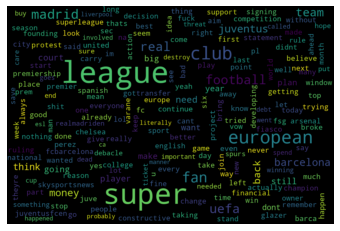

                count
keyword              
super league     2074
european super    456
club              366
fan               208
real madrid       181
team              162
uefa              139
money             129
think             123
football          113
AxesSubplot(0.125,0.125;0.775x0.755)


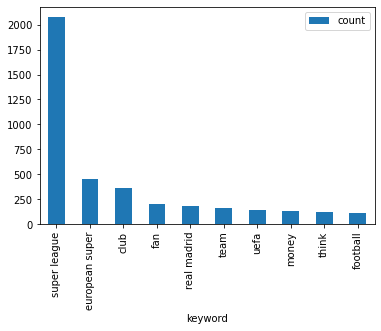

In [84]:
def parties_all_text(b):
    # https://stackoverflow.com/a/51871650
    return ' '.join(df_tweets[df_tweets['text_clean'].str.contains(b)]['text_clean'])

print("Content keywords for tweets about the Super League")
b = 'super league'
wc = WordCloud(width=1200, height=800, max_font_size=110, collocations=False).generate(parties_all_text(b))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

kwords_super_league = WordCloud().process_text(parties_all_text(b))
df_kwords_super_league = pd.DataFrame(list(kwords_super_league.items()), columns=['keyword', 'count']).set_index('keyword')
print(df_kwords_super_league.sort_values(by = "count", ascending=False).head(10))
print(df_kwords_super_league.sort_values(by = "count", ascending=False).head(10).plot.bar())

Looking at the talking points for the Super League, we can see that the financial aspects are popular, fans care about the financial wellbeing of their clubs. Also what is interesting is that the debate is no longer about relegation, or the lack of relegation, as the Super League clubs have amended this. Unfortunately the same goes for no focus on corruption by UEFA or Suspected Qatar influence on the clubs that did not join the Super League (Hanna, 2021).

## Recommended steps 

The European Super League should take the following steps:
* Promote their financial need for the new system
* Keep pushing the same reason behind the change
* Be open about updates, keep the fans in the loop
* Support Investigations into the negative sides of UEFA and the opposition
* Wait until the right moment to relaunch, the need for the clubs to launch was present, but not the negative news about the opposition
* Design and promote a new relegation system
* Reaffirm the moral high ground, utilize the legal victories
* The PR battle was won online, and mainly through soccer twitter, the protest was just a result of this. The Super League needs a much stronger Social Media campaign ahead of their relaunch

# References

Hanna, M. (April 26. 2021). The Role of Gulf Money in the European Super League’s ‘Own Goal’. WPR. URL: https://www.worldpoliticsreview.com/trend-lines/29603/the-role-of-gulf-money-in-the-european-super-league-s-own-goal
<br>
<br>
Jahns, M. (April 8, 2021). Top 10: Europe's Most Popular Football Clubs on Instagram, Facebook, Twitter and TikTok. Ispo. URL: https://www.ispo.com/en/markets/top-10-europes-most-popular-football-clubs-instagram-facebook-twitter-and-tiktok
<br>
<br>
Marsden, S. & Llorens, M (July 30, 2021). Barcelona, Real Madrid, Juventus praise court's Super League ruling over UEFA. ESPN. URL: https://www.espn.com/soccer/uefa-champions-league/story/4442466/barcelonareal-madridjuventus-praise-courts-super-league-ruling-over-uefa
<br>
<br>
Melnæs, H. & Ødegård, P. (September 19, 2017). The Aleksander Čeferin Show. Josimar. URL: https://www.josimar.no/artikler/the-aleksander-ceferin-show/4241/
<br>
<br>
Reuters Staff (July 30, 2021). Soccer-Super League trio to carry on with breakaway project after court decision. Reuters. URL: https://www.reuters.com/article/uk-soccer-superleague-idUKKBN2F02FB
<br>
<br>
Twitter. (2021). Use Cases, Tutorials, & Documentation | Twitter Developer Platform. Twitter. URL: https://developer.twitter.com/en